In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("3.txt",header=2 , sep="\t")

In [3]:
df

,Fecha,Hora,TIPO,VISTO POR,Hora_i,Hora_pk,Hora_f,Clase,Lugar,RA,fulgf_i
0,20200308,15:33-15:40,III,MEXART,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20201027,17:16-17:17,III,MEXART,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20201027,17:24-17:26,III,MEXART,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20201028,20:55-20:56,III,MEXART,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20201118,19:13-19:13,III,MEXART,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
281,20220827,23:50-23:50,III,MEXICO-LANCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,20220828,16:03-16:05,III,MEXICO-LANCE,15:48,16:19,16:46,M6.7,S30W85,3088.0,120.0
283,20220829,15:54-15:58,III,MEXICO-LANCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,20220829,16:13-16:13,III,"MEXART, MEXICO-LANCE",16:11,17:05,18:00,M2.5,S28W85,3088.0,90.0


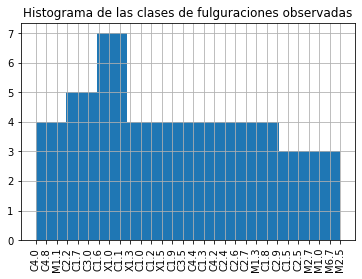

In [4]:
#df.sort_values('Clase', inplace=True)
df.Clase.hist()
plt.xticks(rotation='vertical')
plt.title('Histograma de las clases de fulguraciones observadas')
plt.show()



In [5]:
for a in range(len(df)):
    if type(df['Clase'][a])==str:
        print(df.loc[[a]])

       Fecha         Hora TIPO VISTO POR Hora_i Hora_pk Hora_f Clase   Lugar  \
19  20210509  13:54-13:56  III    MEXART  13:38   13:58  14:09  C4.0  N16E51   

        RA  fulgf_i  
19  2822.0    165.0  
       Fecha         Hora TIPO VISTO POR Hora_i Hora_pk Hora_f Clase   Lugar  \
24  20210521  19:24-19:30  III    MEXART  19:15   19:28  19:32  C4.8  N18E29   

        RA  fulgf_i  
24  2824.0     95.0  
       Fecha         Hora TIPO VISTO POR Hora_i Hora_pk Hora_f Clase   Lugar  \
27  20210522  17:07-17:11  III    MEXART  17:03   17:11  17:16  M1.1  N18E18   

        RA  fulgf_i  
27  2824.0    180.0  
       Fecha         Hora TIPO VISTO POR Hora_i Hora_pk Hora_f Clase   Lugar  \
29  20210523  17:01-17:05  III    MEXART  17:00   17:05  17:10  C2.2  N20E01   

        RA  fulgf_i  
29  2824.0    170.0  
       Fecha         Hora TIPO VISTO POR Hora_i Hora_pk Hora_f Clase   Lugar  \
34  20210828  13:21-13:24  III    MEXART  13:08   13:11  13:15  C1.7  S25W03   

        RA  fulgf_i

        Fecha         Hora TIPO     VISTO POR Hora_i Hora_pk Hora_f Clase  \
269  20220815  15:56-15:58  III  MEXICO-LANCE  15:55   16:09  16:18  C2.5   

      Lugar      RA  fulgf_i  
269  S11W46  3079.0    150.0  
        Fecha         Hora TIPO             VISTO POR Hora_i Hora_pk Hora_f  \
271  20220815  16:48-16:54  III  MEXART, MEXICO-LANCE  16:40   16:54  16:58   

    Clase   Lugar      RA  fulgf_i  
271  M2.7  S22W00  3078.0    130.0  
        Fecha         Hora TIPO                     VISTO POR Hora_i Hora_pk  \
272  20220817  14:36-14:48  III  MEXART, MEXICO-LANCE, (UNAM)  14:28   14:52   

    Hora_f Clase   Lugar      RA  fulgf_i  
272  15:10  M1.0  S26W25  3078.0    220.0  
        Fecha         Hora TIPO     VISTO POR Hora_i Hora_pk Hora_f Clase  \
282  20220828  16:03-16:05  III  MEXICO-LANCE  15:48   16:19  16:46  M6.7   

      Lugar      RA  fulgf_i  
282  S30W85  3088.0    120.0  
        Fecha         Hora TIPO             VISTO POR Hora_i Hora_pk Hora_f  \
284  

In [6]:
df.Fecha=pd.to_datetime(df.Fecha, format='%Y%m%d', errors='ignore')


In [7]:
#Considerar los asociados a fulguraciones
lalafecha=[]
nivel=[]
info=pd.DataFrame()

for a in range(len(df['Clase'])):
    if type(df['Clase'][a]) == str:
        if df['Clase'][a][0]=='C':
            nivel.append(float(df['Clase'][a][1:]))
            lalafecha.append(df['Fecha'][a])
            
        if df['Clase'][a][0]=='M':
            nivel.append(10*float(df['Clase'][a][1:]))
            lalafecha.append(df['Fecha'][a])

        if df['Clase'][a][0]=='X':
            nivel.append(100*float(df['Clase'][a][1:]))
            lalafecha.append(df['Fecha'][a])
            
            #print(df.iloc[[a]])

            
            
nivoverda=[]
nivel=[]
for a in range(len(df.Fecha)):
    if type(df['Clase'][a])==str:
        if df['Clase'][a][0]=='C':
            nivel.append(float(df['Clase'][a][1:]))
            lalafecha.append(df['Fecha'][a])
            
        if df['Clase'][a][0]=='M':
            nivel.append(10*float(df['Clase'][a][1:]))
            lalafecha.append(df['Fecha'][a]) 
            
        if df['Clase'][a][0]=='X':
            nivel.append(100*float(df['Clase'][a][1:]))
            lalafecha.append(df['Fecha'][a]) 
    else:
        nivel.append('-')   
        
   
df=df.assign(NivelVerdad=nivel)
print(df)

         Fecha         Hora TIPO             VISTO POR Hora_i Hora_pk Hora_f  \
0   2020-03-08  15:33-15:40  III                MEXART    NaN     NaN    NaN   
1   2020-10-27  17:16-17:17  III                MEXART    NaN     NaN    NaN   
2   2020-10-27  17:24-17:26  III                MEXART    NaN     NaN    NaN   
3   2020-10-28  20:55-20:56  III                MEXART    NaN     NaN    NaN   
4   2020-11-18  19:13-19:13  III                MEXART    NaN     NaN    NaN   
..         ...          ...  ...                   ...    ...     ...    ...   
281 2022-08-27  23:50-23:50  III          MEXICO-LANCE    NaN     NaN    NaN   
282 2022-08-28  16:03-16:05  III          MEXICO-LANCE  15:48   16:19  16:46   
283 2022-08-29  15:54-15:58  III          MEXICO-LANCE    NaN     NaN    NaN   
284 2022-08-29  16:13-16:13  III  MEXART, MEXICO-LANCE  16:11   17:05  18:00   
285 2022-09-03  18:52-18:53  III          MEXICO-LANCE    NaN     NaN    NaN   

    Clase   Lugar      RA  fulgf_i Nive

In [8]:
#hacerlo float
#for a in range(len(df['Clase'])):
    #if df['Clase'][a]!='-':
        #print(df['Clase'][a])
        #df['Clase'][a]=(df['Clase'][a][1:])


In [9]:
#Las que estan asociadas a fulguraciones

quitar=[]
for a in range(len(df.NivelVerdad)):
    #print(df.iloc[a][-1])
    if df.iloc[a][-1] == '-':
        #print('aqui '+str(a))
        quitar.append(a)
        #print(df.iloc[a][-1])
df=df.drop(quitar)
print(df)

df=df.reset_index(drop=True)
#print(quitar)

         Fecha         Hora TIPO                               VISTO POR  \
19  2021-05-09  13:54-13:56  III                                  MEXART   
24  2021-05-21  19:24-19:30  III                                  MEXART   
27  2021-05-22  17:07-17:11  III                                  MEXART   
29  2021-05-23  17:01-17:05  III                                  MEXART   
34  2021-08-28  13:21-13:24  III                                  MEXART   
35  2021-08-30  19:33-19:35  III                                  MEXART   
36  2021-08-30  21:31-21:35  III                                  MEXART   
46  2021-10-02  23:56-23:57  III                                (MEXART)   
52  2021-10-28  15:28-15:30  III                                  MEXART   
54  2022-03-07  15:00-15:02  III                                  MEXART   
57  2022-03-30  17:31-17:31  III  MEXART, MEXICO-LANCE-A, MEXICO-LANCE-B   
62  2022-05-03  16:17-16:23  III                                  MEXART   
63  2022-05-

In [10]:
print(df)

        Fecha         Hora TIPO                               VISTO POR  \
0  2021-05-09  13:54-13:56  III                                  MEXART   
1  2021-05-21  19:24-19:30  III                                  MEXART   
2  2021-05-22  17:07-17:11  III                                  MEXART   
3  2021-05-23  17:01-17:05  III                                  MEXART   
4  2021-08-28  13:21-13:24  III                                  MEXART   
5  2021-08-30  19:33-19:35  III                                  MEXART   
6  2021-08-30  21:31-21:35  III                                  MEXART   
7  2021-10-02  23:56-23:57  III                                (MEXART)   
8  2021-10-28  15:28-15:30  III                                  MEXART   
9  2022-03-07  15:00-15:02  III                                  MEXART   
10 2022-03-30  17:31-17:31  III  MEXART, MEXICO-LANCE-A, MEXICO-LANCE-B   
11 2022-05-03  16:17-16:23  III                                  MEXART   
12 2022-05-09  17:35-17:3

In [11]:
#Frecuencia inferior

dist_i=( 4.32/(np.log10( (1.0/4.2)*(df.fulgf_i/.009)**2.0  ) -4.0 )   )
df.insert(10,'R_sol', dist_i )

In [12]:
#DIVIDIR INSTRUMENTOS
lancea=pd.DataFrame()
lanceb=pd.DataFrame()
mexar=pd.DataFrame()

#SEPARAR EN UN CUADRO DE DATOS A CADA INSTRUMENTO
for a in range(len(df['VISTO POR'])):
    if ('LANCE') in (df['VISTO POR'][a]) or ('LANCE-A') in (df['VISTO POR'][a]):
        lancea=lancea.append(df.iloc[a])
    if ('LANCE-B') in (df['VISTO POR'][a]):
        lanceb=lanceb.append(df.iloc[a])
    if ('MEXART') in (df['VISTO POR'][a]):
        mexar=mexar.append(df.iloc[a])


/tmp/ipykernel_20580/1693961365.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mexar=mexar.append(df.iloc[a])
/tmp/ipykernel_20580/1693961365.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mexar=mexar.append(df.iloc[a])
/tmp/ipykernel_20580/1693961365.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mexar=mexar.append(df.iloc[a])
/tmp/ipykernel_20580/1693961365.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mexar=mexar.append(df.iloc[a])
/tmp/ipykernel_20580/1693961365.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mexar=

/tmp/ipykernel_20580/1693961365.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mexar=mexar.append(df.iloc[a])
/tmp/ipykernel_20580/1693961365.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lancea=lancea.append(df.iloc[a])
/tmp/ipykernel_20580/1693961365.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lanceb=lanceb.append(df.iloc[a])
/tmp/ipykernel_20580/1693961365.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lancea=lancea.append(df.iloc[a])
/tmp/ipykernel_20580/1693961365.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  la

/tmp/ipykernel_20580/2844460136.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,100)


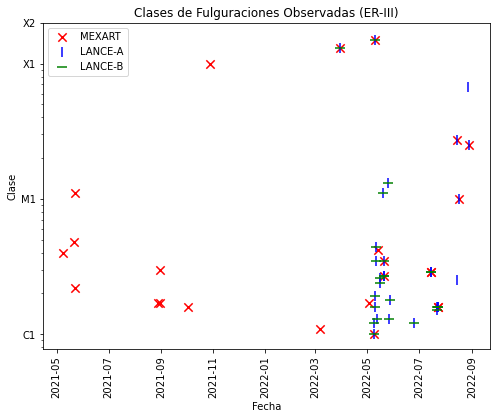

In [13]:
#Distancia vs frecuencia inicial           juntas

plt.rcParams["figure.figsize"] = [8.0, 6.0]
#plt.rcParams["figure.autolayout"] = True
        
#mexar.sort_values('srbhconcmeh', inplace=True)
#lancea.sort_values('srbhconcmeh', inplace=True)
#lanceb.sort_values('srbhconcmeh', inplace=True)

fig, ax = plt.subplots()

mexar.plot('Fecha',y='NivelVerdad',logy=True, kind='scatter', color='r', marker='x', label='MEXART',s=70,ax=ax)
lancea.plot('Fecha',y='NivelVerdad',logy=True,ax=ax,xlabel='Fecha',ylabel='Clase', kind='scatter', color='b',marker='|',s=100,label='LANCE-A',)
lanceb.plot('Fecha',y='NivelVerdad',logy=True,ax=ax, ylabel='Clase',kind='scatter', color='g',marker='_',s=100,label='LANCE-B',)
ax.set_ylim(0,100)
ax.set_yticks([1, 10, 100 ,200])
ax.set_yticklabels(["C1", "M1", "X1", 'X2']) 
plt.xticks(rotation='vertical')
plt.title('Clases de Fulguraciones Observadas (ER-III)')
plt.legend(loc=2)

plt.savefig('clasevsfechaeriii.svg')
plt.show()